In [677]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.font_manager as fm

In [678]:
font_path = 'extra/Cinzel-VariableFont_wght.ttf'

cinzel_font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)

In [679]:
RED = '#6F1D1B'

In [680]:
def decorate_plot(ax, xname, yname, loc):
    SIZE_TICKS = 12

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # x axis name
    ax.set_xlabel(xname, fontsize=15)

    # y axis name
    ax.set_ylabel(yname, fontsize=15)

    # Adjust the font size of the tick labels
    ax.tick_params(axis='both', which='major', labelsize=SIZE_TICKS)

    if loc:
        plt.legend(fontsize=10, loc=loc)

    # Update font settings
    plt.rcParams.update({
        "font.family": cinzel_font.get_name(), 
        "font.size": 16
    })

    # Adjust layout
    plt.tight_layout()

<h2> <center> Global Electricity Production </center> </h2>

In [681]:
electricity_df = pd.read_csv('data/global_electricity_production_data.csv')
electricity_df

,country_name,date,parameter,product,value,unit
0,Australia,12/1/2023,Net Electricity Production,Electricity,22646.1901,GWh
1,Australia,12/1/2023,Net Electricity Production,Total Combustible Fuels,13397.9356,GWh
2,Australia,12/1/2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",9768.5223,GWh
3,Australia,12/1/2023,Net Electricity Production,Oil and Petroleum Products,289.5415,GWh
4,Australia,12/1/2023,Net Electricity Production,Natural Gas,3091.9272,GWh
...,...,...,...,...,...,...
121069,United States,1/1/2010,Total Imports,Electricity,5808.5770,GWh
121070,United States,1/1/2010,Total Exports,Electricity,996.5670,GWh
121071,United States,1/1/2010,Used for pumped storage,Electricity,2283.3220,GWh
121072,United States,1/1/2010,Distribution Losses,Electricity,22933.2970,GWh


In [682]:
electricity_df['parameter'].value_counts()

parameter
Net Electricity Production        93318
Final Consumption (Calculated)     6036
Distribution Losses                6033
Total Exports                      5416
Total Imports                      5411
Used for pumped storage            4846
Remarks                              14
Name: count, dtype: int64

In [683]:
France_df = electricity_df[(electricity_df['country_name'] == 'France') & 
                           (electricity_df['product'] == 'Electricity') & 
                           (electricity_df['parameter'] == 'Final Consumption (Calculated)')].copy()

# start_date = pd.to_datetime('01/01/2010', format='%m/%d/%Y')
# end_date   = pd.to_datetime('12/01/2023', format='%m/%d/%Y')

France_df['date'] = pd.to_datetime(electricity_df['date'], format='%m/%d/%Y')

# France_df = France_df[(France_df['date'] >= start_date) & 
#                       (France_df['date'] <= end_date)]

France_df.sort_values('date', inplace=True)

# France_df

In [684]:
# data = France_df['unit'].value_counts()
# data

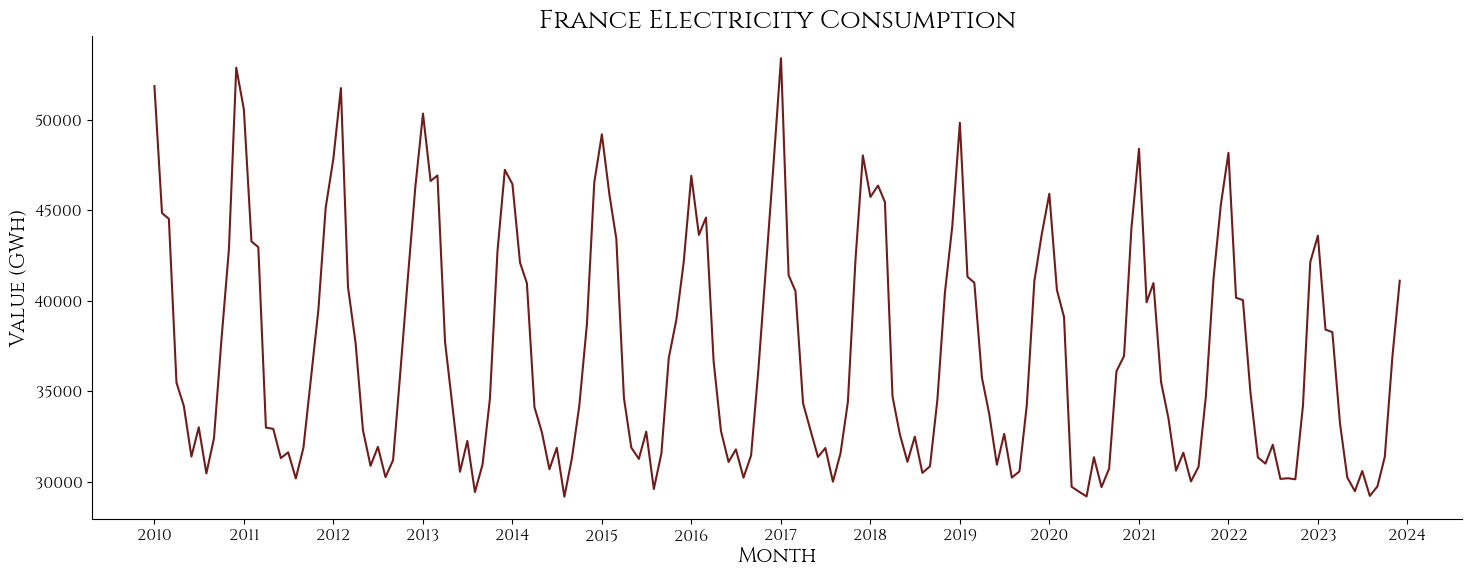

In [685]:
# Create the plot
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(France_df['date'], France_df['value'], linestyle='-', color=RED)

ax.set_title('France Electricity Consumption')

decorate_plot(ax, 'Month', 'Value (GWh)', '')

# Format the x-axis to show all month names.
# start_year = France_df['date'].dt.year.min()
# end_year = France_df['date'].dt.year.max()

# months = pd.date_range("2020-01-01", "2023-12-01", freq='MS')
# ax.set_xticks(months)
# ax.set_xticklabels(months.strftime('%b'))

year_locator = mdates.YearLocator()
year_formatter = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(year_locator)
ax.xaxis.set_major_formatter(year_formatter)

# plt.xticks(rotation=0)

# plt.savefig(f'images/time_series_example_France.png', dpi=300, transparent=True)

plt.show()

<h2> <center> Video Game Sales </center> </h2>

In [686]:
games_df = pd.read_csv('data/vgsales.csv')
games_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [687]:
# games_df = games_df[(games_df['Platform'] == 'PC') & (games_df['Name'] == 'Need for Speed: Most Wanted')].copy()
# games_df = games_df[(games_df['Platform'] == 'PC')].copy()

games_df = games_df.groupby('Year')['Global_Sales'].sum().reset_index()

games_df.dropna(subset=['Year'], inplace=True)
games_df.sort_values('Year', inplace=True)

# games_df

In [688]:
# games_df['Name'].value_counts()

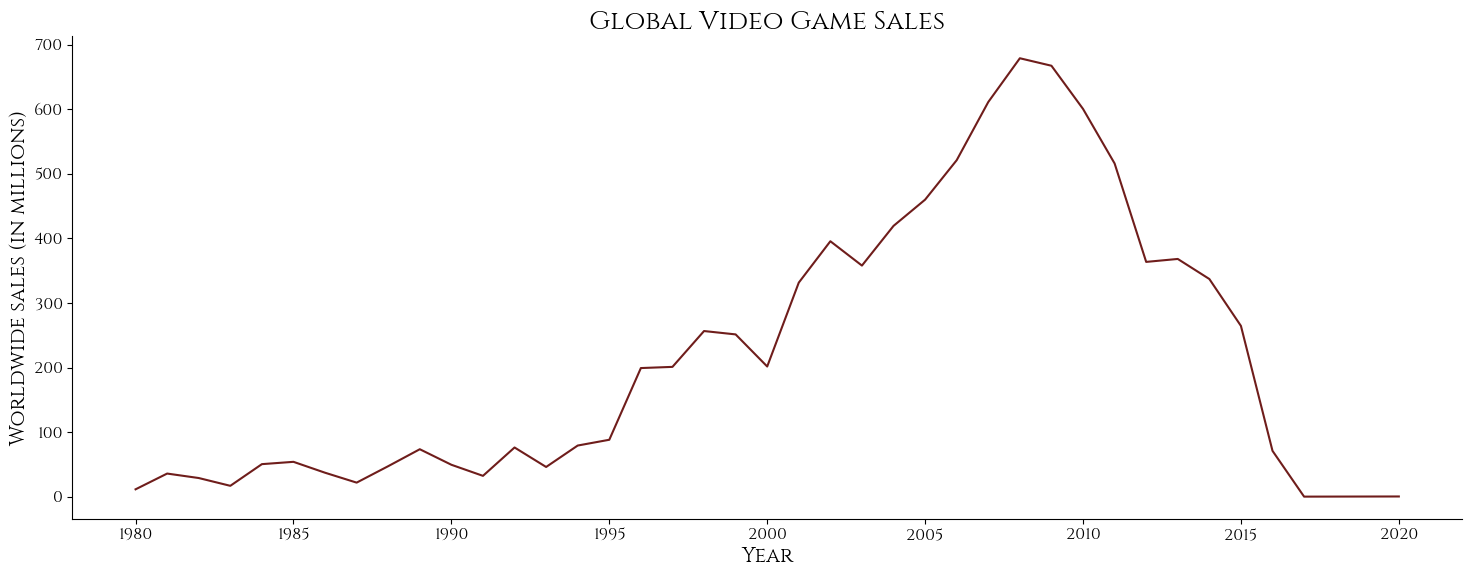

In [689]:
# Create the plot
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(games_df['Year'], games_df['Global_Sales'], linestyle='-', color=RED)

ax.set_title('Global Video Game Sales')

decorate_plot(ax, 'Year', 'Worldwide sales (in millions)', '')

# plt.savefig(f'images/time_series_example_France.png', dpi=300, transparent=True)

plt.show()

<h2> <center> Avocado Sales </center> </h2>

In [690]:
avocado_df = pd.read_csv('data/avocado.csv')
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [691]:
# avocado_df = avocado_df.groupby('Date')['AveragePrice'].mean().reset_index()
avocado_df = avocado_df.groupby('Date')['Total Volume'].mean().reset_index()

avocado_df['Date'] = pd.to_datetime(avocado_df['Date'], format='%Y-%m-%d')

avocado_df.sort_values('Date', inplace=True)

# avocado_df['region'].value_counts()

avocado_df

,Date,Total Volume
0,2015-01-04,7.840216e+05
1,2015-01-11,7.273686e+05
2,2015-01-18,7.258221e+05
3,2015-01-25,7.080211e+05
4,2015-02-01,1.106048e+06
...,...,...
164,2018-02-25,1.011402e+06
165,2018-03-04,1.035601e+06
166,2018-03-11,1.032085e+06
167,2018-03-18,1.052537e+06


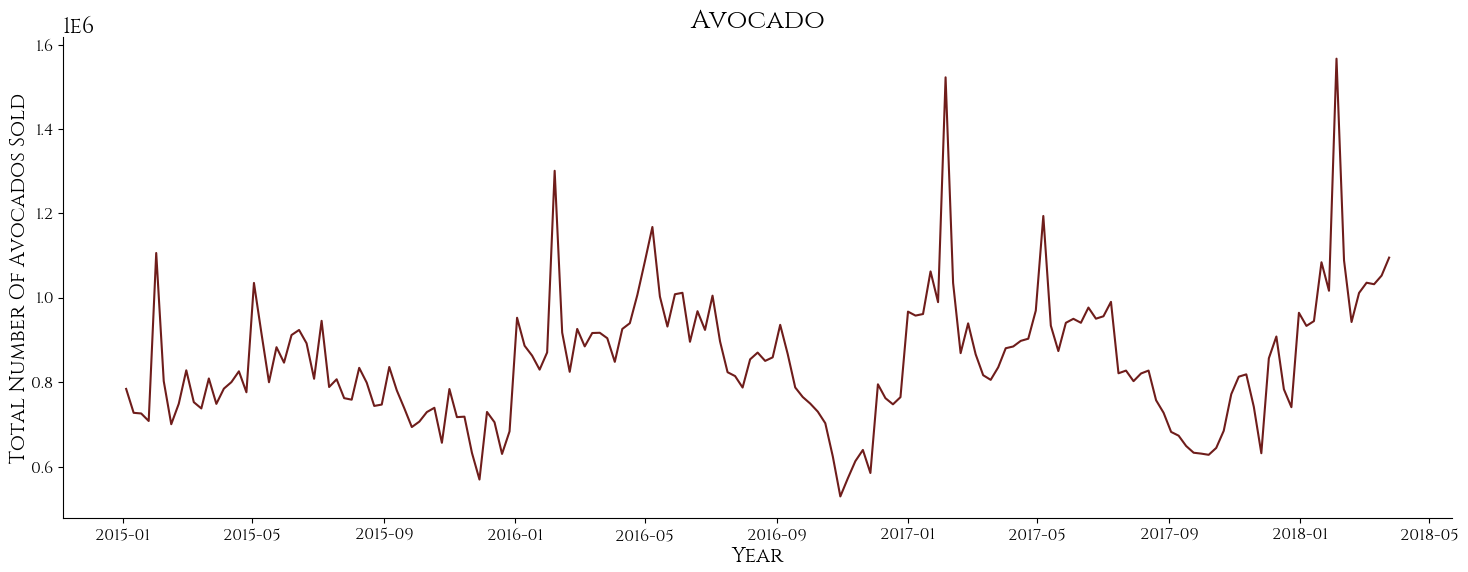

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(avocado_df['Date'], avocado_df['Total Volume'], linestyle='-', color=RED)

ax.set_title('Avocado Sales')

decorate_plot(ax, 'Year', 'Total Number Of Avocados Sold', '')

# plt.savefig(f'images/time_series_example_France.png', dpi=300, transparent=True)

plt.show()

<h2> <center> Gold Price </center> </h2>

In [693]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("rizkykiky/gold-price-dataset")

# print("Path to dataset files:", path)

In [ ]:
gold_df = pd.read_csv('data/gold_prices_quarterly.csv')
gold_df

,Date,USD,EUR,JPY,GBP,CAD,CHF,INR,CNY,TRY,SAR,IDR,AED,THB,VND,EGP,KRW,RUB,ZAR,AUD
0,12/29/1978,214.1,132.1,NaN,107.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/30/1979,238.1,146.6,"47,981.2",118.1,282.0,398.5,"1,944.0",NaN,NaN,794.7,"148,515.9",910.7,"4,800.9",NaN,NaN,"115,233.4",NaN,203.5,210.2
2,6/29/1979,259.3,161.3,"56,555.9",124.5,300.6,444.5,"2,114.6",NaN,NaN,878.4,"161,455.6",991.7,"5,226.6",NaN,NaN,"124,572.2",NaN,219.2,233.9
3,9/28/1979,315.7,190.2,"69,090.6",141.6,368.0,517.0,"2,517.7",NaN,NaN,"1,061.0","197,436.4","1,195.6","6,420.3",NaN,NaN,"153,057.5",NaN,264.1,279.9
4,12/31/1979,408.4,243.8,"98,086.0",189.5,483.4,668.8,"3,347.6",NaN,NaN,"1,384.4","257,354.3","1,555.9","8,345.5",NaN,NaN,"199,028.3",NaN,340.6,372.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,6/30/2022,"1,870.6","1,758.1","242,875.3","1,491.3","2,389.4","1,806.3","144,445.6","12,373.6","29,516.9","7,017.2","27,256,748.6","6,870.7","64,372.4","43,164,258.4","34,671.0","2,361,500.2","125,560.1","29,210.8","2,623.1"
175,9/30/2022,"1,728.9","1,717.2","238,933.9","1,469.6","2,257.1","1,671.2","137,916.6","11,836.3","30,994.5","6,495.7","25,814,666.9","6,350.3","62,921.4","40,566,422.8","33,100.8","2,317,227.7","104,327.3","29,442.6","2,531.4"
176,12/30/2022,"1,725.9","1,693.6","244,438.3","1,471.6","2,342.5","1,664.8","141,718.8","12,285.1","32,124.8","6,487.5","26,846,159.6","6,338.9","62,796.6","42,014,855.4","39,864.7","2,350,658.0","108,431.2","30,429.0","2,629.2"
177,3/31/2023,"1,889.9","1,761.0","250,143.8","1,554.6","2,555.8","1,748.6","155,342.7","12,929.6","35,693.9","7,095.3","28,763,364.6","6,941.4","64,113.6","44,531,622.8","56,929.3","2,412,139.9","138,770.6","33,585.3","2,765.8"


In [695]:
gold_df['USD'] = gold_df['USD'].str.replace(',', '').astype(float)

gold_df['Date'] = pd.to_datetime(gold_df['Date'], format='%m/%d/%Y')

gold_df.sort_values('Date', inplace=True)

# gold_df

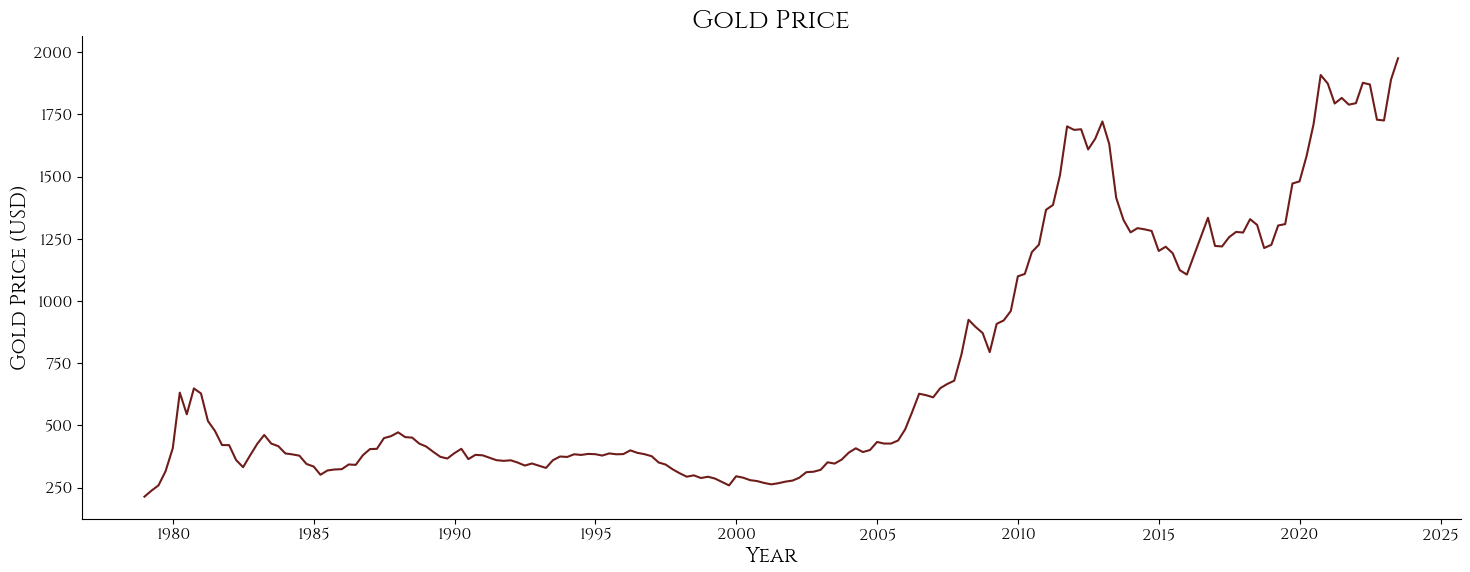

In [696]:
# Create the plot
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(gold_df['Date'], gold_df['USD'], linestyle='-', color=RED)

ax.set_title('Gold Price')

decorate_plot(ax, 'Year', 'Gold Price (USD)', '')

# plt.savefig(f'images/time_series_example_France.png', dpi=300, transparent=True)

plt.show()